<a href="https://colab.research.google.com/github/EBH2002/AppliedMachineLearning/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Importing necessary libraries
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
drive_folder = '/content/drive/MyDrive/AML_ASSIGNMENT_1/'

train_df = pd.read_csv(drive_folder + 'train.csv')
validation_df = pd.read_csv(drive_folder + 'validation.csv')
test_df = pd.read_csv(drive_folder + 'test.csv')

In [3]:
X_train, y_train = train_df.drop('label', axis=1), train_df['label']
X_val, y_val = validation_df.drop('label', axis=1), validation_df['label']
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [ ]:
# @title Training different classifiers and evaluating using performance metrics.

random_state = 42
n_jobs = -1

classifiers = [
    LogisticRegression(random_state=random_state, n_jobs=n_jobs),
    DecisionTreeClassifier(random_state=random_state),
    KNeighborsClassifier(n_jobs=n_jobs),
    MultinomialNB(),
    AdaBoostClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state, n_jobs=n_jobs),
    XGBClassifier(random_state=random_state, n_jobs=n_jobs),
    SVC(random_state=random_state)
]

results = []

for classifier in classifiers:
    start_time = time.time()

    # Training the classifier on training set
    classifier.fit(X_train, y_train)

    # Predicting on the training set
    y_train_pred = classifier.predict(X_train)

    # Predicting on the validation set
    y_val_pred = classifier.predict(X_val)

    # Predict on the test set
    y_test_pred = classifier.predict(X_test)

    # Training set metrics
    train_accuracy = np.mean(y_train_pred == y_train)
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)

    # Validation set metrics
    val_accuracy = np.mean(y_val_pred == y_val)
    val_report = classification_report(y_val, y_val_pred, output_dict=True)
    val_precision = val_report['weighted avg']['precision']
    val_recall = val_report['weighted avg']['recall']
    val_f1 = val_report['weighted avg']['f1-score']
    val_balanced_acc = balanced_accuracy_score(y_val, y_val_pred)

    # Test set metrics
    test_accuracy = np.mean(y_test_pred == y_test)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

    # Calculating the time taken for training
    build_time = time.time() - start_time

    results.append([
        classifier.__class__.__name__,
        train_accuracy, train_precision, train_recall, train_f1, train_balanced_acc,
        val_accuracy, val_precision, val_recall, val_f1, val_balanced_acc,
        test_accuracy, test_precision, test_recall, test_f1, test_balanced_acc,
        build_time
    ])

In [ ]:
columns = [
    "Algorithm",
    "Train Accuracy", "Train Precision", "Train Recall", "Train F1-score", "Train Balanced Accuracy",
    "Validation Accuracy", "Validation Precision", "Validation Recall", "Validation F1-score", "Validation Balanced Accuracy",
    "Test Accuracy", "Test Precision", "Test Recall", "Test F1-score", "Test Balanced Accuracy",
    "Building Time (s)"
]

results = pd.DataFrame(results, columns=columns)

results

,Algorithm,Train Accuracy,Train Precision,Train Recall,Train F1-score,Train Balanced Accuracy,Validation Accuracy,Validation Precision,Validation Recall,Validation F1-score,Validation Balanced Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-score,Test Balanced Accuracy,Building Time (s)
0,LogisticRegression,0.950242,0.950628,0.950242,0.945746,0.814461,0.930701,0.931954,0.930701,0.920452,0.737008,0.932302,0.931427,0.932302,0.923731,0.752403,4.257216
1,DecisionTreeClassifier,0.999309,0.999309,0.999309,0.999308,0.997260,0.932313,0.929790,0.932313,0.930743,0.825082,0.938104,0.938104,0.938104,0.938104,0.860144,6.206161
2,KNeighborsClassifier,0.918452,0.924712,0.918452,0.901019,0.677884,0.898469,0.905780,0.898469,0.868084,0.601450,0.896518,0.899800,0.896518,0.865792,0.598129,7.781287
3,MultinomialNB,0.969938,0.970938,0.969938,0.968158,0.880822,0.933924,0.936660,0.933924,0.924152,0.744300,0.952611,0.954367,0.952611,0.948033,0.816240,0.316628
4,AdaBoostClassifier,0.916033,0.909316,0.916033,0.910796,0.756207,0.903304,0.893958,0.903304,0.896387,0.721326,0.905222,0.900665,0.905222,0.902556,0.759741,9.147884
5,GradientBoostingClassifier,0.980995,0.981245,0.980995,0.980376,0.927002,0.943594,0.942585,0.943594,0.938422,0.798858,0.960348,0.959545,0.960348,0.958362,0.866353,40.953751
6,RandomForestClassifier,0.999309,0.999309,0.999309,0.999308,0.997260,0.952458,0.954333,0.952458,0.947794,0.814825,0.967118,0.967231,0.967118,0.965402,0.880018,4.767605
7,XGBClassifier,0.987215,0.987261,0.987215,0.986970,0.952832,0.952458,0.951594,0.952458,0.949148,0.833890,0.962282,0.961280,0.962282,0.960856,0.880513,13.439789
8,SVC,0.994126,0.994165,0.994126,0.994066,0.976712,0.954875,0.956556,0.954875,0.950737,0.824380,0.964217,0.965163,0.964217,0.961798,0.862042,76.945750


The top three performers are Random Forest Classifier, Gradient Boosting Classifier and Support Vector Classifier(SVC). They performed very well on the training set, with very high accuracy, precision, recall, and F1-score. Although performance on the test set was slightly lower, they still maintained a high level of accuracy and generalization.

In [ ]:
def evaluate_model(model, X, y, dataset_name="Dataset"):
    y_pred = model.predict(X)
    report = classification_report(y, y_pred, output_dict=True)
    balanced_acc = balanced_accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)

    print(f"--- {dataset_name} Metrics ---")
    print(f"Accuracy: {report['accuracy']:.4f}")
    print(f"Precision: {report['weighted avg']['precision']:.4f}")
    print(f"Recall: {report['weighted avg']['recall']:.4f}")
    print(f"F1-Score: {report['weighted avg']['f1-score']:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return report, balanced_acc, conf_matrix


In [ ]:
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}


===== RandomForestClassifier =====

Train Set Evaluation:
--- Train Set Metrics ---
Accuracy: 0.9993
Precision: 0.9993
Recall: 0.9993
F1-Score: 0.9993
Balanced Accuracy: 0.9973

Confusion Matrix:
[[2529    0]
 [   2  363]]


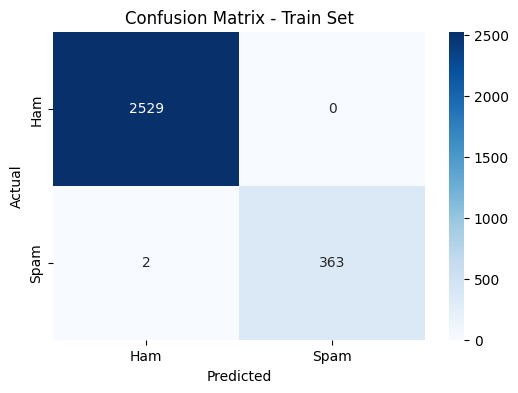


Validation Set Evaluation:
--- Validation Set Metrics ---
Accuracy: 0.9525
Precision: 0.9543
Recall: 0.9525
F1-Score: 0.9478
Balanced Accuracy: 0.8148

Confusion Matrix:
[[1083    1]
 [  58   99]]


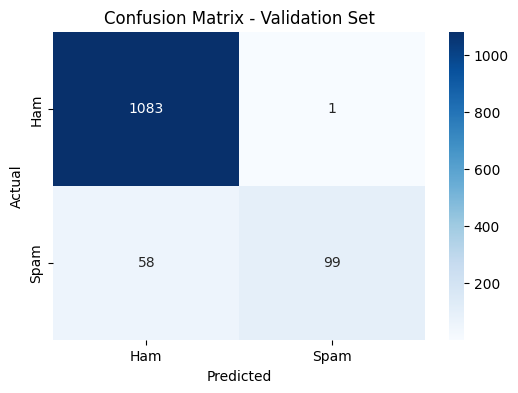

In [ ]:
print(f"\n===== {'RandomForestClassifier'} =====\n")
models["RandomForestClassifier"].fit(X_train, y_train)

print("Train Set Evaluation:")
train_report, train_balanced_acc, train_conf_matrix = evaluate_model(models["RandomForestClassifier"], X_train, y_train, "Train Set")

print("\nValidation Set Evaluation:")
val_report, val_balanced_acc, val_conf_matrix = evaluate_model(models["RandomForestClassifier"], X_val, y_val, "Validation Set")



===== GradientBoostingClassifier =====

Train Set Evaluation:
--- Train Set Metrics ---
Accuracy: 0.9810
Precision: 0.9812
Recall: 0.9810
F1-Score: 0.9804
Balanced Accuracy: 0.9270

Confusion Matrix:
[[2527    2]
 [  53  312]]


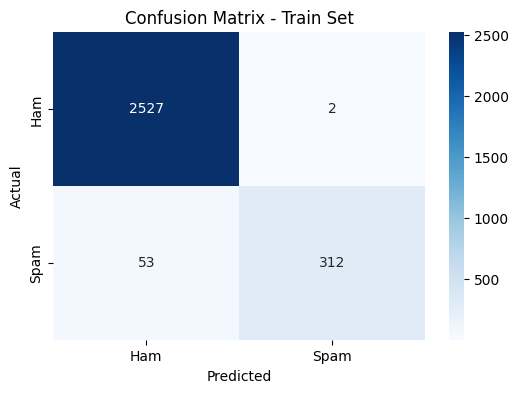


Validation Set Evaluation:
--- Validation Set Metrics ---
Accuracy: 0.9436
Precision: 0.9426
Recall: 0.9436
F1-Score: 0.9384
Balanced Accuracy: 0.7989

Confusion Matrix:
[[1076    8]
 [  62   95]]


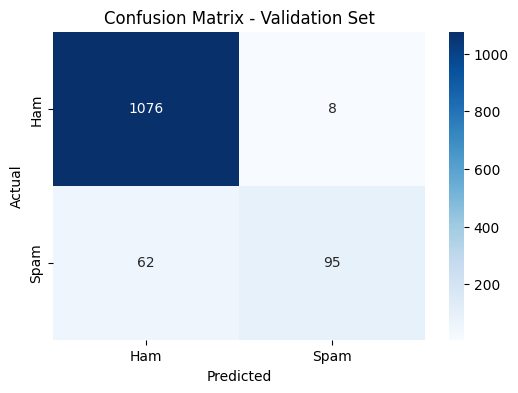

In [ ]:
print(f"\n===== {'GradientBoostingClassifier'} =====\n")
models["GradientBoostingClassifier"].fit(X_train, y_train)

# Train evaluation
print("Train Set Evaluation:")
train_report, train_balanced_acc, train_conf_matrix = evaluate_model(models["GradientBoostingClassifier"], X_train, y_train, "Train Set")

# Validation evaluation
print("\nValidation Set Evaluation:")
val_report, val_balanced_acc, val_conf_matrix = evaluate_model(models["GradientBoostingClassifier"], X_val, y_val, "Validation Set")



===== SVC =====

Train Set Evaluation:
--- Train Set Metrics ---
Accuracy: 0.9941
Precision: 0.9942
Recall: 0.9941
F1-Score: 0.9941
Balanced Accuracy: 0.9767

Confusion Matrix:
[[2529    0]
 [  17  348]]


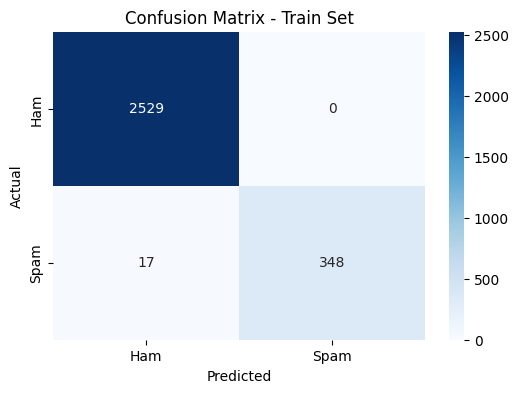


Validation Set Evaluation:
--- Validation Set Metrics ---
Accuracy: 0.9549
Precision: 0.9566
Recall: 0.9549
F1-Score: 0.9507
Balanced Accuracy: 0.8244

Confusion Matrix:
[[1083    1]
 [  55  102]]


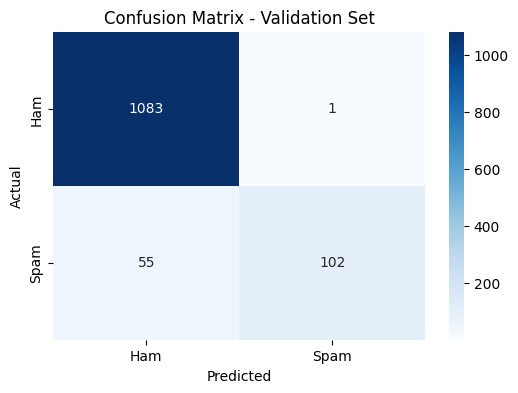

In [ ]:
print(f"\n===== {'SVC'} =====\n")
models["SVC"].fit(X_train, y_train)

# Train evaluation
print("Train Set Evaluation:")
train_report, train_balanced_acc, train_conf_matrix = evaluate_model(models["SVC"], X_train, y_train, "Train Set")

# Validation evaluation
print("\nValidation Set Evaluation:")
val_report, val_balanced_acc, val_conf_matrix = evaluate_model(models["SVC"], X_val, y_val, "Validation Set")



===== Cross-Validation: RandomForestClassifier =====

Metric              Mean Score     Std Deviation  
--------------------------------------------------
accuracy            0.9637         0.0117         
precision_weighted  0.9648         0.0111         
recall_weighted     0.9637         0.0117         
f1_weighted         0.9609         0.0135         

Test Set Evaluation:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       903
        Spam       0.97      0.76      0.85       131

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



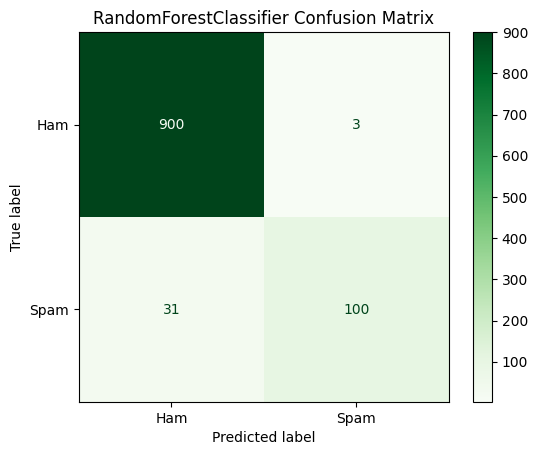


===== Cross-Validation: GradientBoostingClassifier =====

Metric              Mean Score     Std Deviation  
--------------------------------------------------
accuracy            0.9568         0.0082         
precision_weighted  0.9556         0.0089         
recall_weighted     0.9568         0.0082         
f1_weighted         0.9548         0.0093         

Test Set Evaluation:
              precision    recall  f1-score   support

         Ham       0.96      0.99      0.98       903
        Spam       0.93      0.74      0.83       131

    accuracy                           0.96      1034
   macro avg       0.95      0.87      0.90      1034
weighted avg       0.96      0.96      0.96      1034



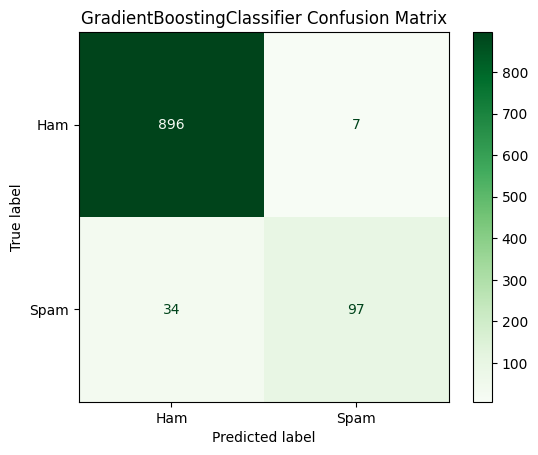


===== Cross-Validation: SVC =====

Metric              Mean Score     Std Deviation  
--------------------------------------------------
accuracy            0.9582         0.0057         
precision_weighted  0.9597         0.0048         
recall_weighted     0.9582         0.0057         
f1_weighted         0.9546         0.0070         

Test Set Evaluation:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       903
        Spam       0.99      0.73      0.84       131

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.96      0.96      1034



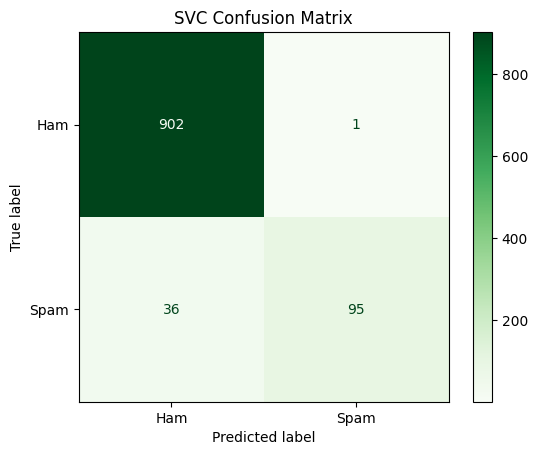

In [ ]:
# @title Cross validating to check robustness and evaluating their performance on test set

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

cv_folds = 5

def cross_validate_model(model, X, y, cv_folds):
    scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    results = {}

    for metric in scoring_metrics:
        scores = cross_val_score(model, X, y, scoring=metric, cv=cv_folds, n_jobs=-1)
        results[metric] = {
            "mean": scores.mean(),
            "std": scores.std()
        }
    return results

for model_name, model in models.items():
    print(f"\n===== Cross-Validation: {model_name} =====")

    results = cross_validate_model(model, X_train, y_train, cv_folds)

    print(f"\n{'Metric':<20}{'Mean Score':<15}{'Std Deviation':<15}")
    print("-" * 50)
    for metric, values in results.items():
        print(f"{metric:<20}{values['mean']:<15.4f}{values['std']:<15.4f}")

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print("\nTest Set Evaluation:")
    test_report = classification_report(y_test, y_test_pred, target_names=['Ham', 'Spam'])
    test_conf_matrix = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    print(test_report)
    ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=["Ham", "Spam"]).plot(cmap="Greens")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()




In this case classifying a ham messages as scam messages should be avoided, hence judging the models on precision, Support Vector Classifier is the most efficient model.